In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [7]:
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1)
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp

def variable(df,sensor="fluke"):
    tmp = pd.DataFrame(df[sensor])
    tmp.dropna(inplace=True)
    return tmp


In [8]:
archivo = "../../data/fluke_20-07-2021_prueba.csv"
fluke = importa_fluke(archivo)
fluke.head(3)


,fluke
tiempo,
2021-07-20 14:30:04,469.0
2021-07-20 14:30:34,469.0
2021-07-20 14:31:04,486.0


In [9]:
tb = pd.read_csv("../../data/sensores_20-07-2021.csv",index_col=0,parse_dates=True)
nombre = "scd30"
sensor = variable(tb,nombre)
sensor['derivada'] = sensor.diff().rolling("60S").mean()
sensor["tiempo"]       = sensor.index
sensor["transcurrido"] = sensor.tiempo - sensor.tiempo.iloc[0] 
# del sensor["tiempo"]
sensor.head(3)

,scd30,derivada,tiempo,transcurrido
ts,,,,
2021-07-20 14:30:19.894,462.0,NaN,2021-07-20 14:30:19.894,0 days 00:00:00
2021-07-20 14:31:22.968,577.0,115.0,2021-07-20 14:31:22.968,0 days 00:01:03.074000
2021-07-20 14:32:26.114,685.0,108.0,2021-07-20 14:32:26.114,0 days 00:02:06.220000


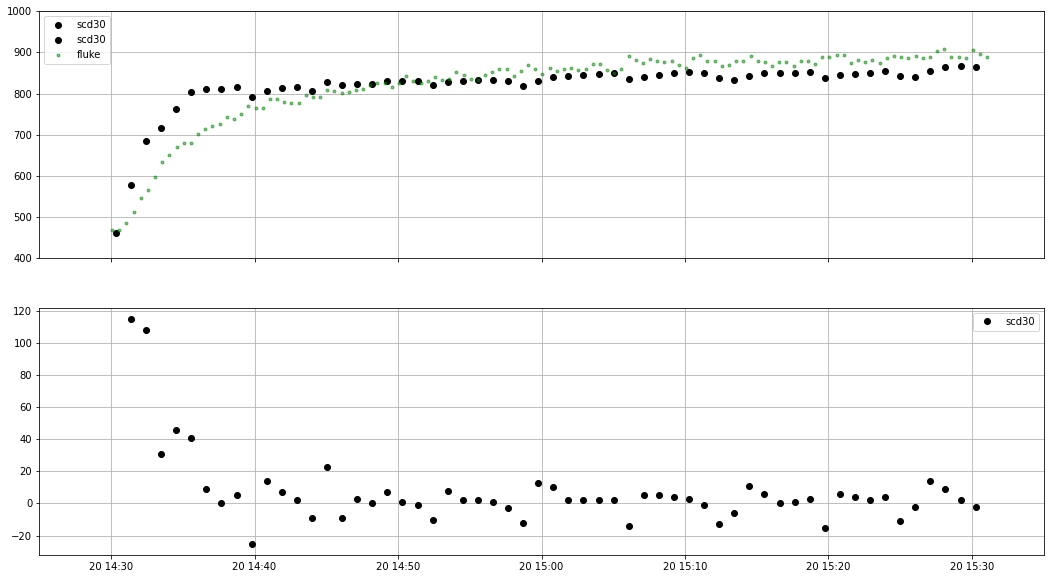

In [10]:
figuras = 2
fig, ax = plt.subplots(figuras,figsize=(18,10),sharex=True)

fecha1 = parse("2021-07-20 14:25") 
fecha2 = fecha1 + pd.Timedelta("70min")

ax[0].set_xlim(fecha1,fecha2)
ax[0].set_ylim(400,1000)

ax[0].plot(sensor.rolling("1S").mean(),"ko",label=nombre)
ax[0].plot(fluke.rolling("1S").mean(),"g.",label="fluke",alpha=0.5)

ax[1].plot(sensor.derivada,"ko",label=nombre)

for figura in range(figuras):
    ax[figura].grid()
    ax[figura].legend()

# El TR es 


In [11]:
sensor[sensor.derivada<=0].head(1)

,scd30,derivada,tiempo,transcurrido
ts,,,,
2021-07-20 14:37:41.510,812.0,0.0,2021-07-20 14:37:41.510,0 days 00:07:21.616000


# < M > 

In [12]:
sensor.rolling("5Min").mean().tail(2)

,scd30,derivada
ts,,
2021-07-20 15:29:12.210,853.8,2.4
2021-07-20 15:30:15.288,858.0,4.2


 #  < D_r > 

In [14]:
fluke.rolling("5Min").mean().tail(1)

,fluke
tiempo,
2021-07-20 15:31:04,893.9


#  Error

In [15]:
fluke.fluke.rolling("5Min").mean().tail(1).values - sensor[nombre].rolling("5Min").mean().tail(1).values 

array([35.9])